
# ASSIGNED Universal electric



Universal Electric, Inc manufactures and sells two types of lamps: L1 and L2. They make a profit of \\$150 on L1 and \\$100 on L2. There are two workers that can make the lamps, W1 and W2. W1 works for 100 hours a month, and W2 works for 80 hours a month.

W1 assembles L1 in 20 minutes, and L2 in 30 minutes. W2 paints L1 in 20 min and L2 in 10 minutes. Assuming that all lamps that are made can be sold, how many of each kind of lamp should the workers make to maximize the profit, and how much profit will be made?




## solution



There are two variables we need to solve for, L1 and L2, which are the number of each type of lamp we want to solve. The total profit is just the sum of the profit for each one times the profit of that lamp.

We have two constraints to consider. One is the total time that worker 1 works must be less than or equal to 100 hours/month, and the total time for worker two is 80 hours/month. We compute these times based on the time it takes to process each kind of lamp.

Here is the solution:



In [1]:
from scipy.optimize import minimize

def profit(X):
    L1, L2 = X
    return -(L1 * 150 + L2 * 100)

def c1(X):
    'W1 100 hours/month'
    L1, L2 = X
    return 100 - (L1 * 20 / 60 + L2 * 30 / 60)

def c2(X):
    'W2 80 hours / month'
    L1, L2 = X
    return 80 - (L1 * 20 / 60 + L2 * 10 / 60)

sol = minimize(profit, (10, 10),
               constraints=[{'type': 'ineq', 'fun': c1},
                            {'type': 'ineq', 'fun': c2}])
sol

     fun: -37500.00000432619
     jac: array([-150., -100.])
 message: 'Optimization terminated successfully.'
    nfev: 17
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([210.00000003,  60.        ])

In [2]:
print(f'We make ${-sol.fun:1.2f}/month of profit by making {int(sol.x[0])} L1 lamps, and {int(sol.x[1])} L2 lamps.')

We make $37500.00/month of profit by making 210 L1 lamps, and 60 L2 lamps.


We should check that the constraints are met. This means the constraint functions are greater than or equal to zero (within a tolerance).



In [3]:
c1(sol.x), c2(sol.x)

(-1.0894893875956768e-08, -9.357535191156785e-09)

You can see the constraints in each case are practically zero, even though they are slightly negative. That means the workers are fully scheduled and working the maximum number of hours each.



## Miscellaneous notes

We can visualize the problem and confirm where the solution is with the following plot.

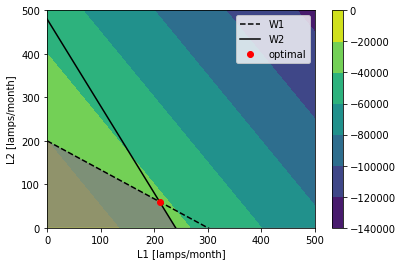

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot contour of the objective
nx1, nx2 = (50, 50)
x1 = np.linspace(0, 500, nx1)
x2 = np.linspace(0, 500, nx2)
x1v, x2v = np.meshgrid(x1, x2)
plt.contourf(x1v, x2v, profit([x1v,x2v]))
plt.colorbar()
plt.ylim([0,500])
plt.xlabel('L1 [lamps/month]')
plt.ylabel('L2 [lamps/month]')

# plot lines of inequality constraints
L2_w1 = -2/3*x1 + 200
L2_w2 = -2*x1 + 480
plt.plot(x1,L2_w1,'--k',label='W1')
plt.plot(x1,L2_w2,'-k',label='W2')


# fill feasible region
eddge = np.minimum(L2_w1,L2_w2) #upper edge of the feasible region
plt.fill_between(x1, eddge, 0, facecolor='gray', alpha = 0.8)

# Plot the solution
plt.plot(sol.x[0],sol.x[1],'or',label='optimal')
plt.legend()